In [21]:
# Load library
import pandas as pd

In [22]:
# Load dataset and save memory, improve speed

# select columns to use
cols_to_use = ["Summons Number", "Plate", "State", "License Type", "Issue Date", "Violation Time", "Violation", "Fine Amount", "Amount Due", "Precinct", "County", "Issuing Agency"]

# input data type map
dtype_map = {
    "Summons Number": "int64",
    "Plate": "category",
    "State": "category",
    "License Type": "category",
    "Violation Time": "string",
    "Violation": "category",
    "Fine Amount": "float32",
    "Amount Due": "float32",
    "Precinct": "int64",
    "County": "category",
    "Issuing Agency": "category"
    # do not include 'Issue Date' here - included in parse_dates command
}

# Load the CSV using a relative path
df = pd.read_csv("data/Open_Parking_and_Camera_Violations_2024.csv",
                 usecols=cols_to_use,
                 dtype=dtype_map,
                 low_memory=False,
                 parse_dates=["Issue Date"],
                 dayfirst=False  # important if format is MM/DD/YYYY)
                )

# Preview the first few rows
df.head()

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Fine Amount,Amount Due,Precinct,County,Issuing Agency
0,T626964C,NY,OMT,5137042444,09/08/2024,04:10P,FAILURE TO STOP AT RED LIGHT,50.0,0.0,0,QN,DEPARTMENT OF TRANSPORTATION
1,LDA5100,NY,PAS,4882492696,01/22/2024,03:35P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0,ST,DEPARTMENT OF TRANSPORTATION
2,KVW2980,NY,PAS,5137042699,09/08/2024,04:18P,FAILURE TO STOP AT RED LIGHT,50.0,0.0,0,ST,DEPARTMENT OF TRANSPORTATION
3,KZH8222,NY,PAS,4882495697,01/22/2024,04:44P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0,QN,DEPARTMENT OF TRANSPORTATION
4,MHB1068,PA,PAS,5137043473,09/08/2024,04:57P,FAILURE TO STOP AT RED LIGHT,50.0,0.0,0,BK,DEPARTMENT OF TRANSPORTATION


In [23]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16314089 entries, 0 to 16314088
Data columns (total 12 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Plate           category
 1   State           category
 2   License Type    category
 3   Summons Number  int64   
 4   Issue Date      object  
 5   Violation Time  string  
 6   Violation       category
 7   Fine Amount     float32 
 8   Amount Due      float32 
 9   Precinct        int64   
 10  County          category
 11  Issuing Agency  category
dtypes: category(6), float32(2), int64(2), object(1), string(1)
memory usage: 922.1+ MB


## Heatmap

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Parse 'Issue Date' and extract weekday name
df["Weekday"] = df["Issue Date"].dt.day_name()

# Step 2: Clean and parse 'Violation Time' into hour
df["Violation Time Clean"] = df["Violation Time"].str.strip().str.upper()
df["Violation Time Parsed"] = pd.to_datetime(df["Violation Time Clean"], format="%I:%M%p", errors="coerce")
df["Hour"] = df["Violation Time Parsed"].dt.hour

# Step 3: Drop rows with missing hour or weekday
df_heatmap = df.dropna(subset=["Hour", "Weekday"])

# Step 4: Build pivot table: Hour (rows) × Weekday (columns), values = count
heatmap_data = (
    df_heatmap.groupby(["Hour", "Weekday"])
    .size()
    .unstack(fill_value=0)
)

# Step 5: Reorder weekdays to calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(columns=ordered_days, fill_value=0)

# Step 6: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="magma_r",  # dark = high
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Violations'}
)

plt.title("Violation Heatmap by Hour of Day and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [42]:
### Figuring out why the code failed b/c of dtype after ETL process

In [43]:
print(df["Issue Date"].dtype)

object


In [44]:
df["Issue Date"] = pd.to_datetime(df["Issue Date"], errors="coerce")

In [45]:
print(df["Issue Date"].dtype)

datetime64[ns]


In [46]:
### Back to code

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Parse 'Issue Date' and extract weekday name
df["Weekday"] = df["Issue Date"].dt.day_name()

# Step 2: Clean and parse 'Violation Time' into hour
df["Violation Time Clean"] = df["Violation Time"].str.strip().str.upper()
df["Violation Time Parsed"] = pd.to_datetime(df["Violation Time Clean"], format="%I:%M%p", errors="coerce")
df["Hour"] = df["Violation Time Parsed"].dt.hour

# Step 3: Drop rows with missing hour or weekday
df_heatmap = df.dropna(subset=["Hour", "Weekday"])

# Step 4: Build pivot table: Hour (rows) × Weekday (columns), values = count
heatmap_data = (
    df_heatmap.groupby(["Hour", "Weekday"])
    .size()
    .unstack(fill_value=0)
)

# Step 5: Reorder weekdays to calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(columns=ordered_days, fill_value=0)

# Step 6: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="magma_r",  # dark = high
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Violations'}
)

plt.title("Violation Heatmap by Hour of Day and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [60]:
### Test Weekday

In [61]:
df["Issue Date"] = pd.to_datetime(df["Issue Date"], errors="coerce")
df["Weekday"] = df["Issue Date"].dt.day_name()

In [62]:
print(df["Weekday"].head(10))

0       Sunday
1       Monday
2       Sunday
3       Monday
4       Sunday
5       Monday
6       Sunday
7       Sunday
8    Wednesday
9       Sunday
Name: Weekday, dtype: object


In [63]:
print(df["Weekday"].value_counts(dropna=False))

Weekday
Tuesday      2652011
Thursday     2572472
Friday       2562442
Monday       2459736
Wednesday    2384212
Saturday     2048359
Sunday       1592306
NaN            42551
Name: count, dtype: int64


In [64]:
### Test Day of Week

In [65]:
# Normalize strings like "04:10P"
df["Violation Time Clean"] = df["Violation Time"].str.strip().str.upper()

# Parse time and extract hour
df["Violation Time Parsed"] = pd.to_datetime(df["Violation Time Clean"], format="%I:%M%p", errors="coerce")
df["Hour"] = df["Violation Time Parsed"].dt.hour

In [66]:
# confirm if "Hour" was parsed correctly

print(df[["Violation Time", "Violation Time Parsed", "Hour"]].dropna().head(10))
print("Missing Hour %:", df["Hour"].isna().mean() * 100)

Empty DataFrame
Columns: [Violation Time, Violation Time Parsed, Hour]
Index: []
Missing Hour %: 100.0


In [67]:
# Examine Raw Values 

print(df["Violation Time"].dropna().unique()[:10])

<StringArray>
['04:10P', '03:35P', '04:18P', '04:44P', '04:57P', '06:17P', '04:13A',
 '09:43P', '01:12A', '09:46P']
Length: 10, dtype: string


In [68]:
# Step 1: Clean and fix format (turn "04:10P" → "04:10PM")
df["Violation Time Clean"] = (
    df["Violation Time"]
    .str.strip()
    .str.upper()
    .str.replace(r"([AP])$", r"\1M", regex=True)  # adds 'M' to 'A' or 'P'
)

# Step 2: Parse to datetime and extract hour
df["Violation Time Parsed"] = pd.to_datetime(df["Violation Time Clean"], format="%I:%M%p", errors="coerce")
df["Hour"] = df["Violation Time Parsed"].dt.hour

In [69]:
print(df[["Violation Time", "Violation Time Clean", "Violation Time Parsed", "Hour"]].dropna().head(10))
print("Missing Hour %:", df["Hour"].isna().mean() * 100)

  Violation Time Violation Time Clean Violation Time Parsed  Hour
0         04:10P              04:10PM   1900-01-01 16:10:00  16.0
1         03:35P              03:35PM   1900-01-01 15:35:00  15.0
2         04:18P              04:18PM   1900-01-01 16:18:00  16.0
3         04:44P              04:44PM   1900-01-01 16:44:00  16.0
4         04:57P              04:57PM   1900-01-01 16:57:00  16.0
5         06:17P              06:17PM   1900-01-01 18:17:00  18.0
6         04:13A              04:13AM   1900-01-01 04:13:00   4.0
7         09:43P              09:43PM   1900-01-01 21:43:00  21.0
8         01:12A              01:12AM   1900-01-01 01:12:00   1.0
9         09:46P              09:46PM   1900-01-01 21:46:00  21.0
Missing Hour %: 0.21265055008587974


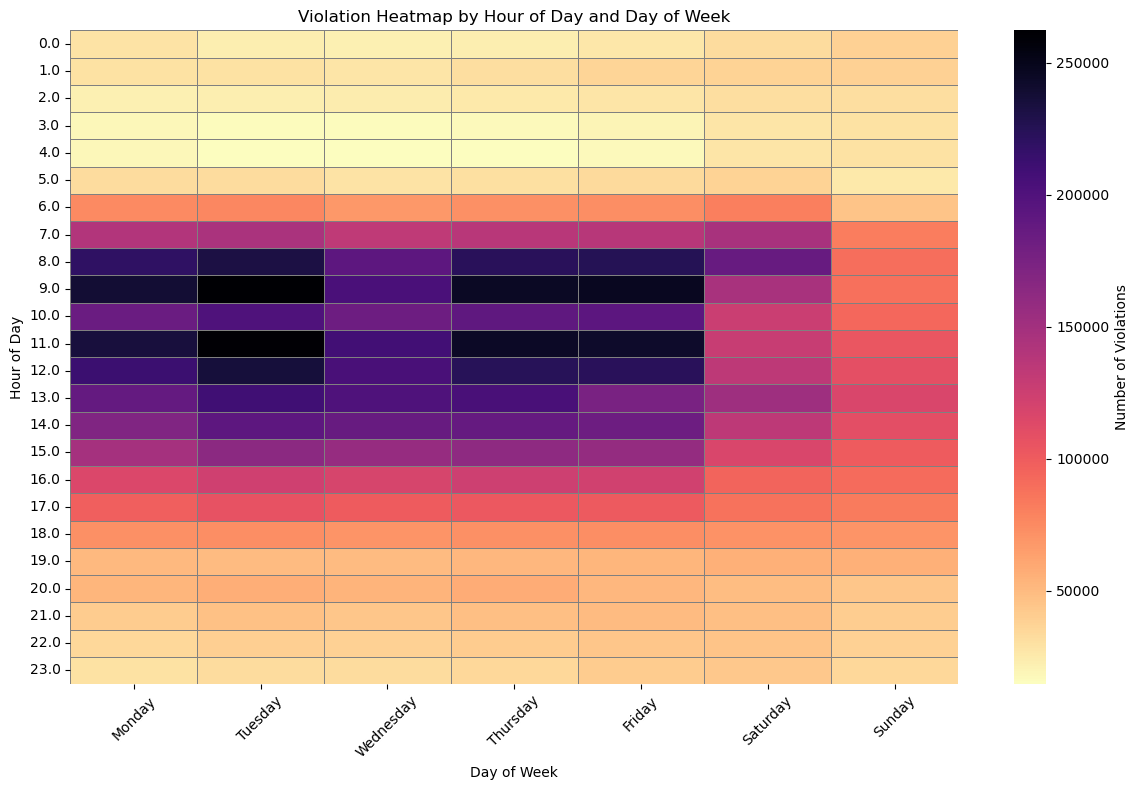

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop rows missing hour or weekday
df_heatmap = df.dropna(subset=["Hour", "Weekday"])

# Step 2: Create pivot table: Hour (rows) × Weekday (columns)
heatmap_data = (
    df_heatmap.groupby(["Hour", "Weekday"])
    .size()
    .unstack(fill_value=0)
)

# Step 3: Ensure weekdays appear in calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(columns=ordered_days, fill_value=0)

# Step 4: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="magma_r",               # dark = high
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Number of Violations"}
)

plt.title("Violation Heatmap by Hour of Day and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig("violations_heatmap.png", dpi=300, bbox_inches='tight')  # High-res PNG

plt.show()

In [71]:
# Get info on data
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16236850 entries, 0 to 16314088
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Plate                  category      
 1   State                  category      
 2   License Type           category      
 3   Summons Number         int64         
 4   Issue Date             datetime64[ns]
 5   Violation Time         string        
 6   Violation              category      
 7   Fine Amount            float32       
 8   Amount Due             float32       
 9   Precinct               int64         
 10  County                 category      
 11  Issuing Agency         category      
 12  Weekday                object        
 13  Violation Time Clean   string        
 14  Violation Time Parsed  datetime64[ns]
 15  Hour                   float64       
dtypes: category(6), datetime64[ns](2), float32(2), float64(1), int64(2), object(1), string(2)
memory usage: 1.5+ GB

In [84]:
# create summary

# Step 1: Drop rows with missing Hour or Weekday
df_model = df.dropna(subset=["Hour", "Weekday"])

# Step 2: Group by Weekday and Hour, count violations
violation_summary = (
    df_model.groupby(["Weekday", "Hour"])
    .size()
    .reset_index(name="Violation Count")
)

# Step 3: Ensure weekday ordering for readability
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
violation_summary["Weekday"] = pd.Categorical(violation_summary["Weekday"], categories=weekday_order, ordered=True)

# Step 4: Sort final table
violation_summary = violation_summary.sort_values(by=["Weekday", "Hour"]).reset_index(drop=True)

# Preview
violation_summary.head()

,Weekday,Hour,Violation Count
0,Monday,0.0,28873
1,Monday,1.0,29426
2,Monday,2.0,21539
3,Monday,3.0,17953
4,Monday,4.0,18490


In [86]:
## Simple Descriptive Ranking

# Step 1: Sort by Violation Count
sorted_violations = violation_summary.sort_values(by="Violation Count")

# Step 2: Get best 3 times (least violations)
best_times = sorted_violations.head(3)

# Step 3: Get worst 3 times (most violations)
worst_times = sorted_violations.tail(3).sort_values(by="Violation Count", ascending=False)

# Display results
print("✅ 3 Best Times to Travel (Fewest Violations):")
print(best_times)

print("\n🚫 3 Worst Times to Travel (Most Violations):")
print(worst_times)

✅ 3 Best Times to Travel (Fewest Violations):
      Weekday  Hour  Violation Count
52  Wednesday   4.0            14735
28    Tuesday   4.0            14984
76   Thursday   4.0            15582

🚫 3 Worst Times to Travel (Most Violations):
     Weekday  Hour  Violation Count
33   Tuesday   9.0           262198
35   Tuesday  11.0           261179
105   Friday   9.0           246847


In [90]:
## Create a Poisson Regression Model and test significance (attempt 1)

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Rename column to remove space
df_poisson = violation_summary.rename(columns={"Violation Count": "Violation_Count"}).copy()

# Step 2: Ensure weekday is categorical
df_poisson["Weekday"] = df_poisson["Weekday"].astype("category")

# Step 3: Fit Poisson model
poisson_model = smf.glm(
    formula="Violation_Count ~ C(Weekday) + Hour",
    data=df_poisson,
    family=sm.families.Poisson()
).fit()

# Step 4: Print summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Violation_Count   No. Observations:                  168
Model:                            GLM   Df Residuals:                      160
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0844e+06
Date:                Wed, 14 May 2025   Deviance:                   8.1665e+06
Time:                        19:32:40   Pearson chi2:                 8.09e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [92]:
import numpy as np

# Exponentiate to get multiplicative effects
exp_coefs = np.exp(poisson_model.params)
print(exp_coefs)

Intercept                  93038.124373
C(Weekday)[T.Tuesday]          1.076976
C(Weekday)[T.Wednesday]        0.966758
C(Weekday)[T.Thursday]         1.043327
C(Weekday)[T.Friday]           1.039077
C(Weekday)[T.Saturday]         0.830390
C(Weekday)[T.Sunday]           0.646318
Hour                           1.008282
dtype: float64


In [94]:
## New Model with binned 'Hours' column

# Step 1: Make a copy and rename column
df_binned = violation_summary.rename(columns={"Violation Count": "Violation_Count"}).copy()

# Step 2: Create time-of-day bins
def bin_hour(hour):
    if 0 <= hour <= 4:
        return "Overnight"
    elif 5 <= hour <= 9:
        return "Morning"
    elif 10 <= hour <= 14:
        return "Afternoon"
    elif 15 <= hour <= 19:
        return "Evening"
    elif 20 <= hour <= 23:
        return "Night"
    else:
        return "Unknown"

df_binned["TimeOfDay"] = df_binned["Hour"].astype(int).apply(bin_hour)
df_binned["TimeOfDay"] = pd.Categorical(df_binned["TimeOfDay"], categories=["Overnight", "Morning", "Afternoon", "Evening", "Night"], ordered=True)
df_binned["Weekday"] = df_binned["Weekday"].astype("category")

# Step 3: Fit the model using Weekday and TimeOfDay as categorical predictors
poisson_model_binned = smf.glm(
    formula="Violation_Count ~ C(Weekday) + C(TimeOfDay)",
    data=df_binned,
    family=sm.families.Poisson()
).fit()

# Step 4: Show summary
print(poisson_model_binned.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        Violation_Count   No. Observations:                  168
Model:                            GLM   Df Residuals:                      157
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1140e+06
Date:                Wed, 14 May 2025   Deviance:                   2.2259e+06
Time:                        19:55:20   Pearson chi2:                 2.08e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [96]:
## Get standarized coefficients

import numpy as np

# Exponentiate to get multiplicative effects
exp_coefs_binned = np.exp(poisson_model_binned.params)
print(exp_coefs_binned)

Intercept                    27090.101804
C(Weekday)[T.Tuesday]            1.076976
C(Weekday)[T.Wednesday]          0.966758
C(Weekday)[T.Thursday]           1.043327
C(Weekday)[T.Friday]             1.039077
C(Weekday)[T.Saturday]           0.830390
C(Weekday)[T.Sunday]             0.646318
C(TimeOfDay)[T.Morning]          4.957689
C(TimeOfDay)[T.Afternoon]        7.095950
C(TimeOfDay)[T.Evening]          3.744960
C(TimeOfDay)[T.Night]            1.695168
dtype: float64
